## Prepare

In [1]:
NUM_TTI_RESEND = 10
alpha = 0.8
beta = 0.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

   MCS/RB   1    2    3    4    5    6    7    8    9  ...    91    92    93  \
0       0  32   64   96  128  168  208  240  272  304  ...  3104  3104  3240   
1       1  40   88  128  176  224  272  304  352  408  ...  3976  4040  4104   
2       2  48  104  160  224  272  320  384  432  504  ...  4872  5000  5000   
3       3  64  136  208  288  352  432  504  576  640  ...  6408  6536  6536   
4       4  80  168  256  352  432  528  608  704  808  ...  7808  7936  8064   

     94    95    96    97    98    99   100  
0  3240  3240  3240  3368  3368  3368  3368  
1  4104  4232  4232  4232  4360  4360  4360  
2  5128  5128  5256  5256  5256  5384  5384  
3  6664  6664  6792  6792  6920  6920  7048  
4  8064  8192  8192  8456  8456  8456  8712  

[5 rows x 101 columns]


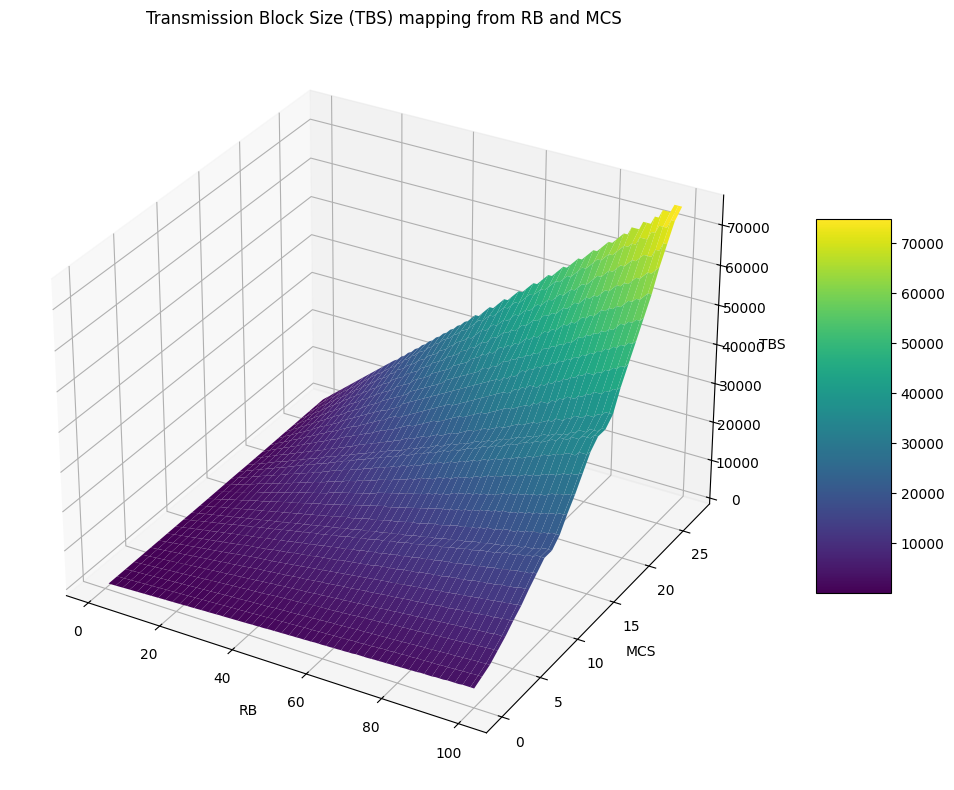

In [3]:
TBS = pd.read_csv('./Simulation/TBSArray.csv')

print(TBS.head(5))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(1, 101)  # RB
Y = np.arange(0, 28)   # MCS
X, Y = np.meshgrid(X, Y)
Z = TBS.iloc[:, 1:].astype(float).values

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('RB')
ax.set_ylabel('MCS')
ax.set_zlabel('TBS')
ax.set_title('Transmission Block Size (TBS) mapping from RB and MCS')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

In [4]:
# Burst Traffic
RoundRobin_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/rr.csv')
MaxCQI_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/max_cqi.csv')
PF_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/pf.csv')

# High Traffic
RoundRobin_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/rr.csv')
MaxCQI_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/max_cqi.csv')
PF_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/pf.csv')

# Ideal Traffic 100000 bits
RoundRobin_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/rr.csv')
MaxCQI_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/max_cqi.csv')
PF_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/pf.csv')

# Low Traffic
RoundRobin_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/rr.csv')
MaxCQI_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/max_cqi.csv')
PF_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/pf.csv')

# Mobility Pattern
RoundRobin_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/rr.csv')
MaxCQI_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/max_cqi.csv')
PF_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/pf.csv')


# Create DataFrame for each property such as: Scheduler Count, Avg Throughput, Max Delay, Avg Delay having 4 columns is UE, RoundRobin, MaxCQI, PF
ue = [col for col in RoundRobin_BurstTraffic.columns if col.startswith('UE')]
scheduler_count_DF1 = pd.DataFrame(index=ue)
avg_throughput_DF1 = pd.DataFrame(index=ue)
max_delay_DF1 = pd.DataFrame(index=ue)
avg_delay_DF1 = pd.DataFrame(index=ue)

scheduler_count_DF2 = pd.DataFrame(index=ue)
avg_throughput_DF2 = pd.DataFrame(index=ue)
max_delay_DF2 = pd.DataFrame(index=ue)
avg_delay_DF2 = pd.DataFrame(index=ue)

scheduler_count_DF3 = pd.DataFrame(index=ue)
avg_throughput_DF3 = pd.DataFrame(index=ue)
max_delay_DF3 = pd.DataFrame(index=ue)
avg_delay_DF3 = pd.DataFrame(index=ue)

scheduler_count_DF4 = pd.DataFrame(index=ue)
avg_throughput_DF4 = pd.DataFrame(index=ue)
max_delay_DF4 = pd.DataFrame(index=ue)
avg_delay_DF4 = pd.DataFrame(index=ue)

scheduler_count_DF5 = pd.DataFrame(index=ue)
avg_throughput_DF5 = pd.DataFrame(index=ue)
max_delay_DF5 = pd.DataFrame(index=ue)
avg_delay_DF5 = pd.DataFrame(index=ue)

scenario = ['High Traffic', 'Ideal Traffic', 'Low Traffic']
total_throughput_DF1 = pd.DataFrame(index=scenario, columns=['Round Robin', 'Max CQI', 'PF'])

## Data input

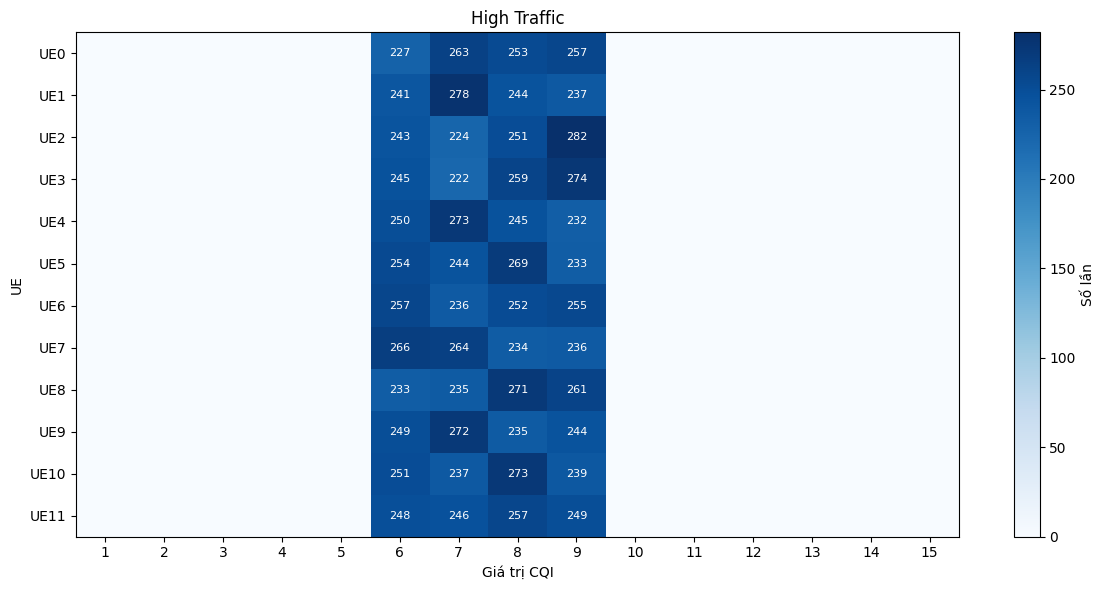

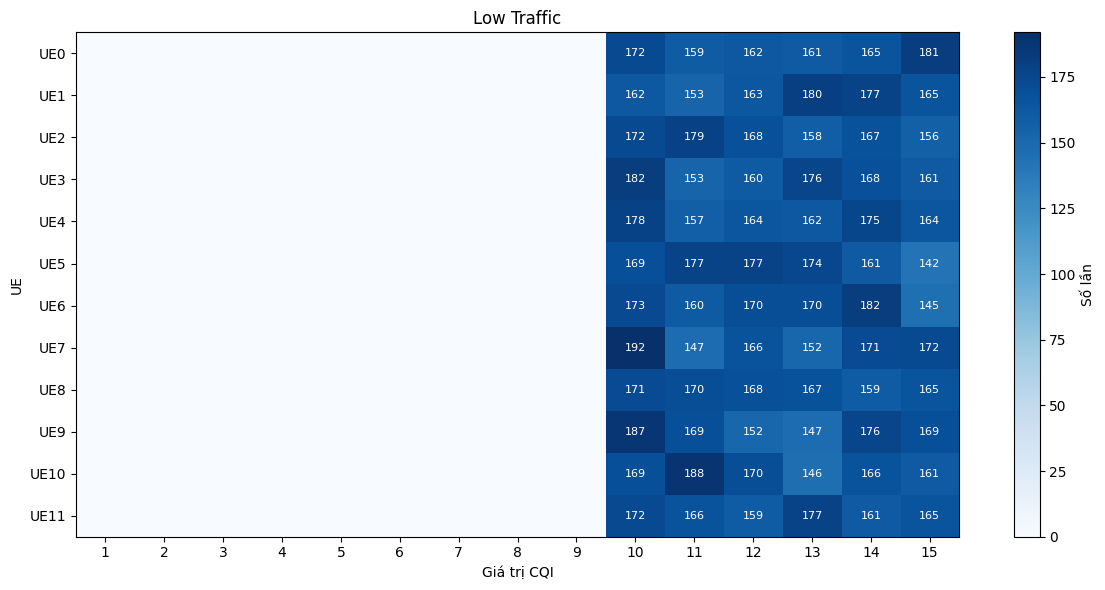

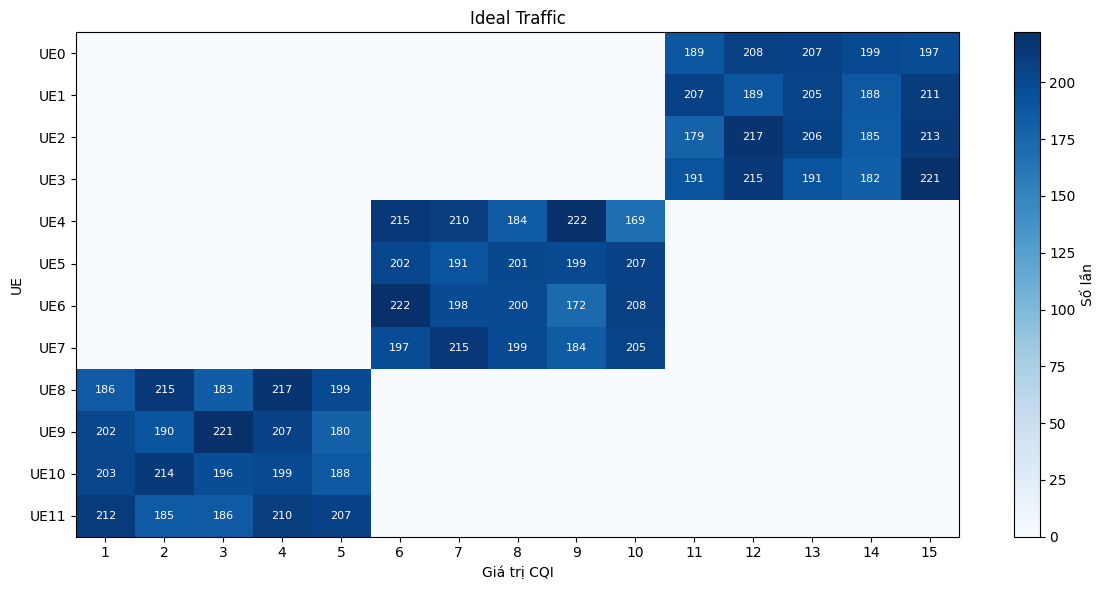

In [5]:
def read_sampled_bsr(csv_path):
    df = pd.read_csv(csv_path)
    return df.iloc[1::10].reset_index(drop=True)

def plot_cqi_count_heatmap(df, cmap='Blues', title='Heatmap số lần xuất hiện CQI'):
    cqi_bins = list(range(1, 16))
    ue_labels = df.columns

    # Tính số lần xuất hiện giá trị CQI từ 1 đến 15 cho mỗi UE
    count_data = []
    for ue in ue_labels:
        counts = df[ue].value_counts().reindex(cqi_bins, fill_value=0)
        count_data.append(counts.values)

    heatmap_data = np.array(count_data)

    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.imshow(heatmap_data, cmap=cmap, aspect='auto')

    # Gắn nhãn
    ax.set_xticks(np.arange(len(cqi_bins)))
    ax.set_yticks(np.arange(len(ue_labels)))
    ax.set_xticklabels(cqi_bins)
    ax.set_yticklabels(ue_labels)

    # Hiển thị giá trị trong từng ô
    for i in range(len(ue_labels)):
        for j in range(len(cqi_bins)):
            value = heatmap_data[i, j]
            if value > 0:
                ax.text(j, i, str(value), ha="center", va="center", color="white", fontsize=8)

    plt.title(title)
    plt.xlabel("Giá trị CQI")
    plt.ylabel("UE")
    plt.colorbar(cax, label='Số lần')
    plt.tight_layout()
    plt.show()
plot_cqi_count_heatmap(read_sampled_bsr('./Simulation/data/cqi_high_traffic.csv'), title='High Traffic')
plot_cqi_count_heatmap(read_sampled_bsr('./Simulation/data/cqi_low_traffic.csv'), title='Low Traffic')
plot_cqi_count_heatmap(read_sampled_bsr('./Simulation/data/cqi_ideal_condition_bsr100000.csv'), title='Ideal Traffic')

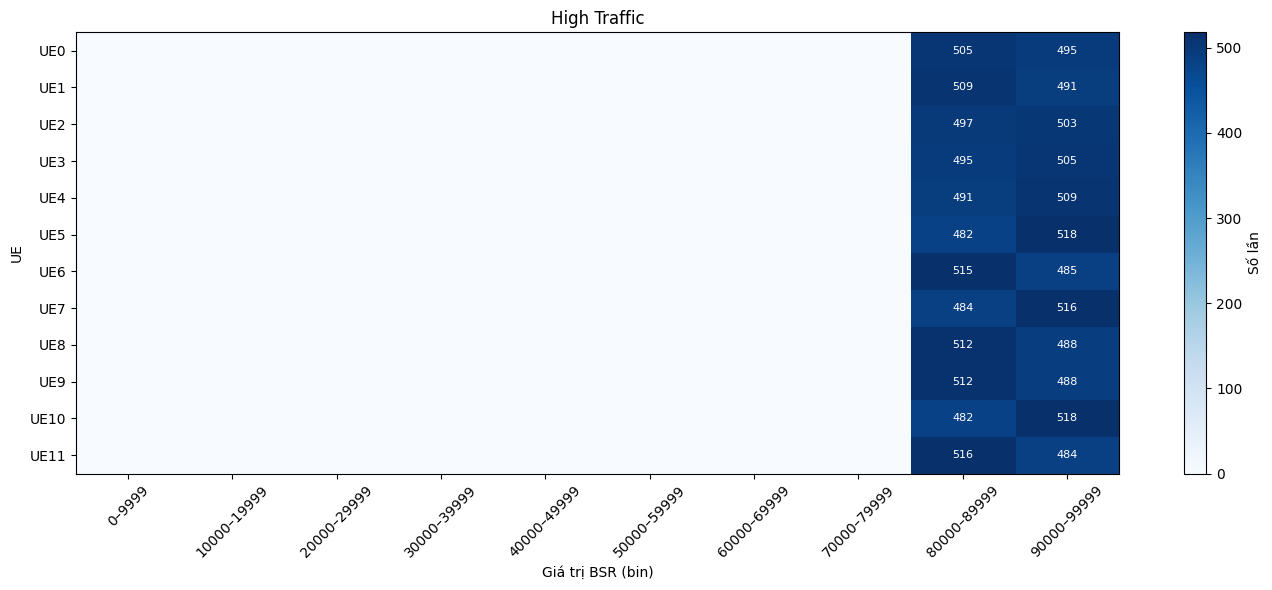

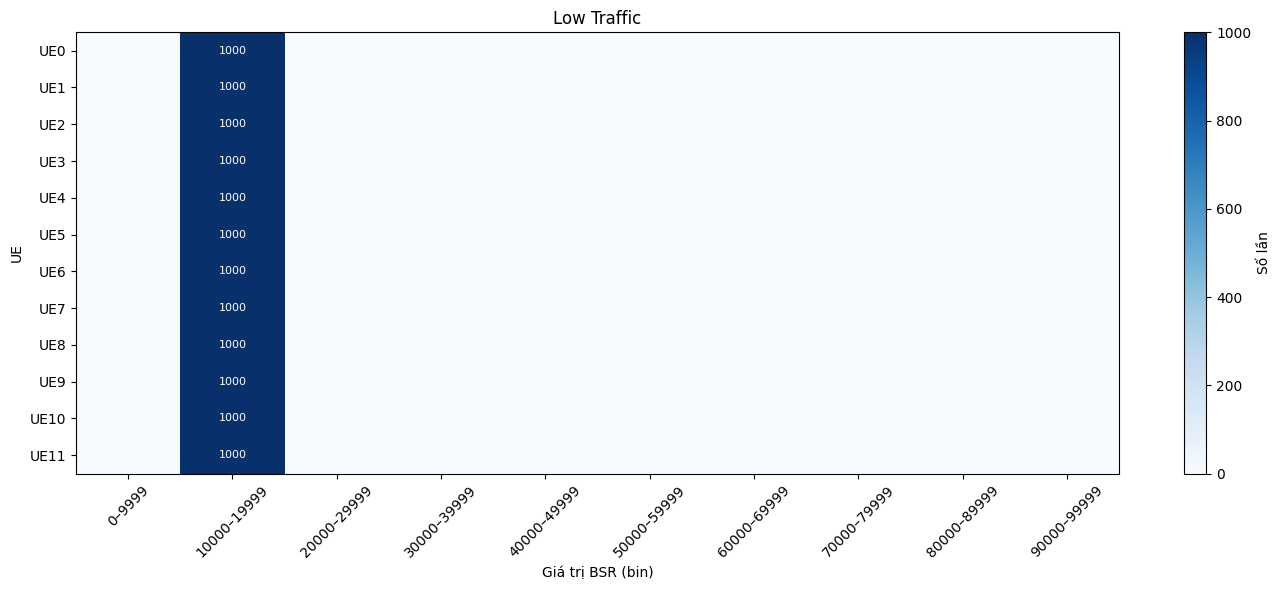

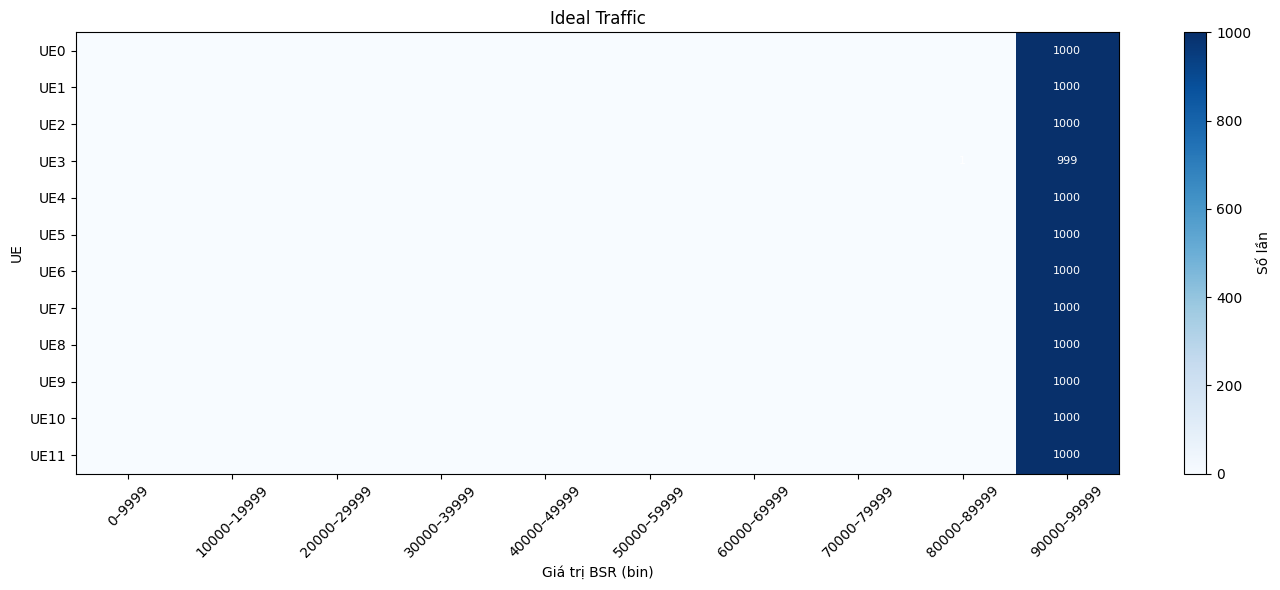

In [6]:


def plot_bsr_count_heatmap(df, bins=None, cmap='Blues', title='Heatmap số lần xuất hiện BSR theo bin'):
    ue_labels = df.columns
    
    # Thiết lập bin mặc định nếu không truyền vào
    if bins is None:
        bins = list(range(0, 110000, 10000))  # 0–100000 chia mỗi 10.000
    
    bin_labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]

    # Tính số lần xuất hiện mỗi bin cho từng UE
    count_data = []
    for ue in ue_labels:
        binned = pd.cut(df[ue], bins=bins, labels=bin_labels, include_lowest=True)
        counts = binned.value_counts().reindex(bin_labels, fill_value=0)
        count_data.append(counts.values)

    heatmap_data = np.array(count_data)

    fig, ax = plt.subplots(figsize=(14, 6))
    cax = ax.imshow(heatmap_data, cmap=cmap, aspect='auto')

    # Nhãn trục
    ax.set_xticks(np.arange(len(bin_labels)))
    ax.set_yticks(np.arange(len(ue_labels)))
    ax.set_xticklabels(bin_labels, rotation=45)
    ax.set_yticklabels(ue_labels)

    # Annotate từng ô
    for i in range(len(ue_labels)):
        for j in range(len(bin_labels)):
            val = heatmap_data[i, j]
            if val > 0:
                ax.text(j, i, str(val), ha='center', va='center', color='white', fontsize=8)

    plt.title(title)
    plt.xlabel("Giá trị BSR (bin)")
    plt.ylabel("UE")
    plt.colorbar(cax, label="Số lần")
    plt.tight_layout()
    plt.show()

plot_bsr_count_heatmap(read_sampled_bsr('./Simulation/data/bsr_high_traffic.csv'), title='High Traffic')
plot_bsr_count_heatmap(read_sampled_bsr('./Simulation/data/bsr_low_traffic.csv'), title='Low Traffic')
plot_bsr_count_heatmap(read_sampled_bsr('./Simulation/data/bsr_ideal_condition_bsr100000.csv'), title='Ideal Traffic')

## Burst Traffic

### Round Robin

In [7]:
ue = [col for col in RoundRobin_BurstTraffic.columns if col.startswith('UE')]
RoundRobin_BurstTraffic_UE = RoundRobin_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF1['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF1['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF1['Round Robin'] = summary['Max Delay']
avg_delay_DF1['Round Robin'] = summary['Avg Delay']

# total_throughput_DF1.at['Burst Traffic', 'Round Robin'] = total_throughput_mbps


Avg Throughput for cell: 25.968669 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              26.046160        2.0   
UE1              3334                25              25.751736        2.0   
UE2              3334                25              26.178608        2.0   
UE3              3334                25              26.087896        2.0   
UE4              3333                25              26.372232        2.0   
UE5              3333                25              25.925656        2.0   
UE6              3333                25              25.921416        2.0   
UE7              3333                25              25.572200        2.0   
UE8              3333                25              25.894928        2.0   
UE9              3333                25              25.700528        2.0   
UE10             3333                25              26.219392        2.0  

### Max C_I

In [8]:
ue = [col for col in MaxCQI_BurstTraffic.columns if col.startswith('UE')]
MaxCQI_BurstTraffic_UE = MaxCQI_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF1['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF1['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF1['Max CQI'] = summary['Max Delay']
avg_delay_DF1['Max CQI'] = summary['Avg Delay']

# total_throughput_DF1.at['Burst Traffic', 'Max CQI'] = total_throughput_mbps


Avg Throughput for cell: 33.256038 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3579                25              34.825296      129.0   
UE1              3544                25              34.471416      107.0   
UE2              3542                25              34.546824      140.0   
UE3              3536                25              34.764272      110.0   
UE4              3497                25              34.834464       91.0   
UE5              3515                25              34.824464      113.0   
UE6              3376                25              33.937104      130.0   
UE7              3311                25              33.513560      170.0   
UE8              3239                25              32.294768      174.0   
UE9              2986                25              30.579976      170.0   
UE10             3277                25              33.347960      180.0  

### Proportional Fair

In [9]:
ue = [col for col in PF_BurstTraffic.columns if col.startswith('UE')]
PF_BurstTraffic_UE = PF_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF1['PF'] = summary['Scheduler Count']
avg_throughput_DF1['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF1['PF'] = summary['Max Delay']
avg_delay_DF1['PF'] = summary['Avg Delay']

# total_throughput_DF1.at['Burst Traffic', 'PF'] = total_throughput_mbps



Avg Throughput for cell: 28.612592 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3335                25              28.786464       10.0   
UE1              3318                25              28.201920       10.0   
UE2              3343                25              28.798720       10.0   
UE3              3350                25              28.907448       10.0   
UE4              3357                25              29.179464       10.0   
UE5              3339                25              28.577456       10.0   
UE6              3325                25              28.609680       10.0   
UE7              3304                25              28.126744       10.0   
UE8              3334                25              28.413000       10.0   
UE9              3298                25              28.085176       11.0   
UE10             3365                25              29.078112        9.0  

### Analysics


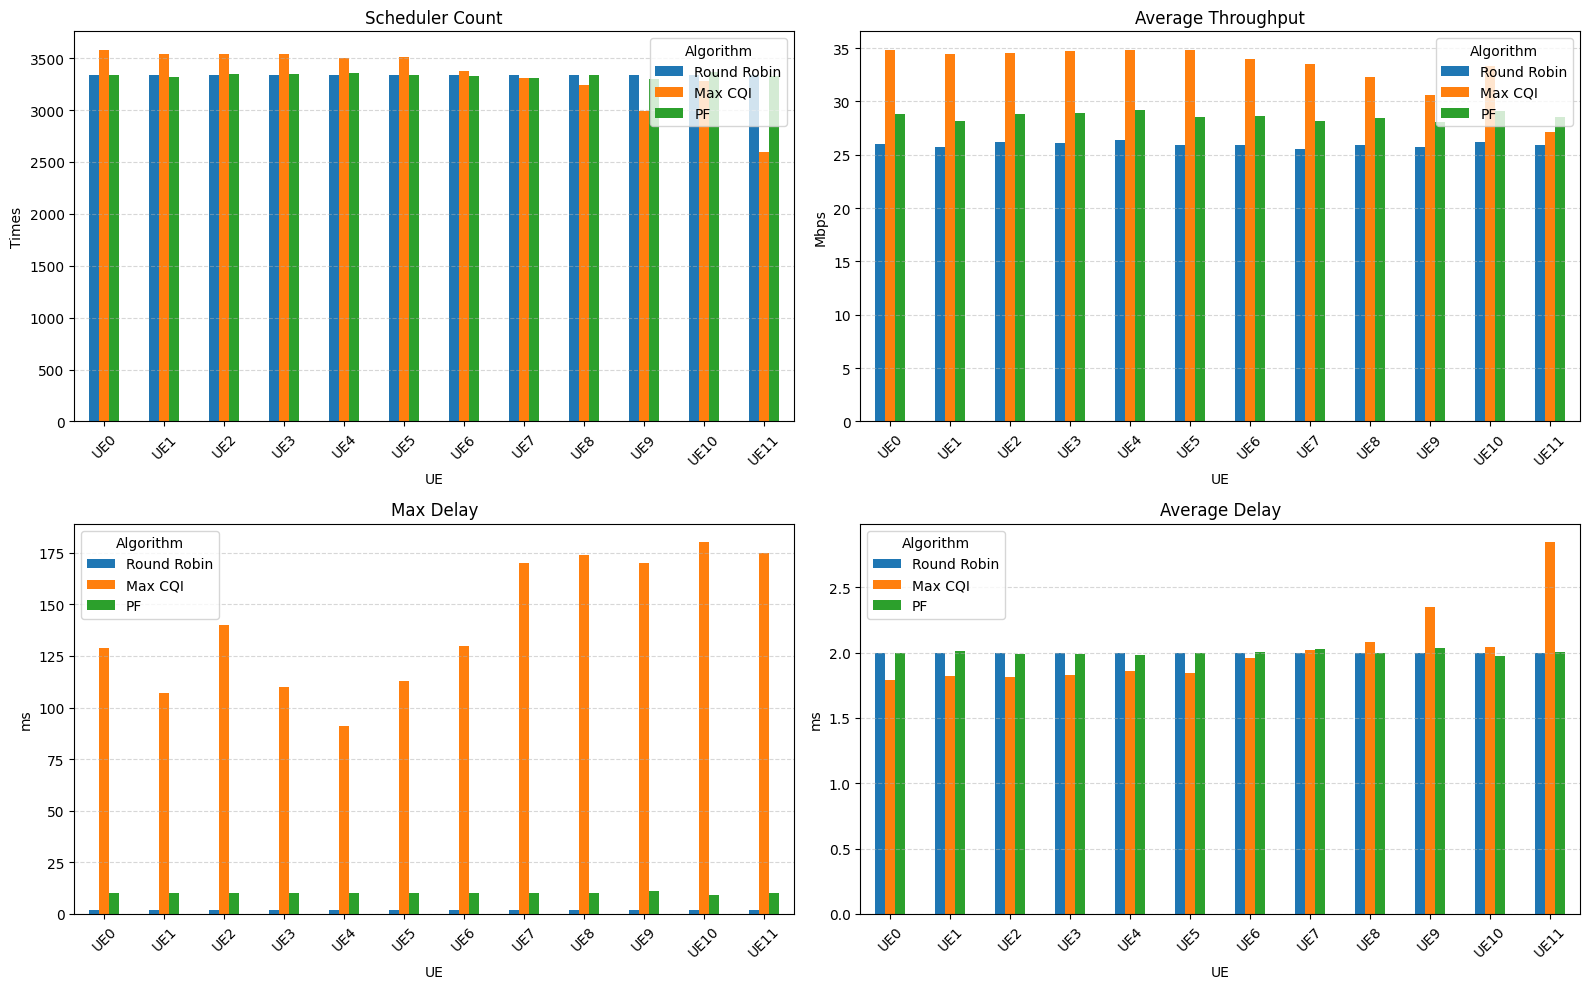

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Tạo 2x2 subplot grid

# Biểu đồ 1: Scheduler Count
scheduler_count_DF1.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("Scheduler Count")
axes[0, 0].set_ylabel("Times")
axes[0, 0].set_xlabel("UE")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0, 0].legend(title="Algorithm")

# Biểu đồ 2: Average Throughput
avg_throughput_DF1.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Average Throughput")
axes[0, 1].set_ylabel("Mbps")
axes[0, 1].set_xlabel("UE")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)
axes[0, 1].legend(title="Algorithm")

# Biểu đồ 3: Max Delay
max_delay_DF1.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Max Delay")
axes[1, 0].set_ylabel("ms")
axes[1, 0].set_xlabel("UE")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)
axes[1, 0].legend(title="Algorithm")

# Biểu đồ 4: Average Delay
avg_delay_DF1.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title("Average Delay")
axes[1, 1].set_ylabel("ms")
axes[1, 1].set_xlabel("UE")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1, 1].legend(title="Algorithm")

plt.tight_layout()
plt.show()

## High Traffic

### Round Robin

In [11]:
ue = [col for col in RoundRobin_HighTraffic.columns if col.startswith('UE')]
RoundRobin_HighTraffic_UE = RoundRobin_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

# save summary to CSV
summary.to_csv('./Simulation/result/high_traffic/rr_HighTraffic_summary.csv')

scheduler_count_DF2['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF2['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF2['Round Robin'] = summary['Max Delay']
avg_delay_DF2['Round Robin'] = summary['Avg Delay']

total_throughput_DF1.at['High Traffic', 'Round Robin'] = total_throughput_mbps


Avg Throughput for cell: 23.173051 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              23.594464        2.0   
UE1              3334                25              22.985000        2.0   
UE2              3334                25              23.166808        2.0   
UE3              3334                25              23.237240        2.0   
UE4              3333                25              23.097896        2.0   
UE5              3333                25              23.054848        2.0   
UE6              3333                25              23.231296        2.0   
UE7              3333                25              23.226968        2.0   
UE8              3333                25              23.181072        2.0   
UE9              3333                25              23.241912        2.0   
UE10             3333                25              22.998160        2.0  

### Max C/I

In [12]:
ue = [col for col in MaxCQI_HighTraffic.columns if col.startswith('UE')]
MaxCQI_HighTraffic_UE = MaxCQI_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF2['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF2['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF2['Max CQI'] = summary['Max Delay']
avg_delay_DF2['Max CQI'] = summary['Avg Delay']

total_throughput_DF1.at['High Traffic', 'Max CQI'] = total_throughput_mbps


Avg Throughput for cell: 29.169827 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              4860                25               41.60240       90.0   
UE1              4070                25               34.72232       80.0   
UE2              4280                25               36.96224      100.0   
UE3              3850                25               33.40080      120.0   
UE4              3740                25               32.61272      150.0   
UE5              3440                25               30.14752      100.0   
UE6              3450                25               30.33512      110.0   
UE7              2920                25               26.00992      280.0   
UE8              2720                25               24.21136      170.0   
UE9              2570                25               23.11096      200.0   
UE10             2090                25               18.77880      250.0  

### Proportional Fair

In [13]:
ue = [col for col in PF_HighTraffic.columns if col.startswith('UE')]
PF_HighTraffic_UE = PF_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF2['PF'] = summary['Scheduler Count']
avg_throughput_DF2['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF2['PF'] = summary['Max Delay']
avg_delay_DF2['PF'] = summary['Avg Delay']

total_throughput_DF1.at['High Traffic', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 24.918155 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3370                25              25.585288        8.0   
UE1              3313                25              24.588760        8.0   
UE2              3323                25              24.892128        9.0   
UE3              3339                25              24.963304        8.0   
UE4              3332                25              24.862208        8.0   
UE5              3326                25              24.810448        8.0   
UE6              3346                25              25.147120        8.0   
UE7              3339                25              24.941696        8.0   
UE8              3333                25              24.816992        8.0   
UE9              3345                25              25.076688        8.0   
UE10             3308                25              24.547632        8.0  

### Analysics

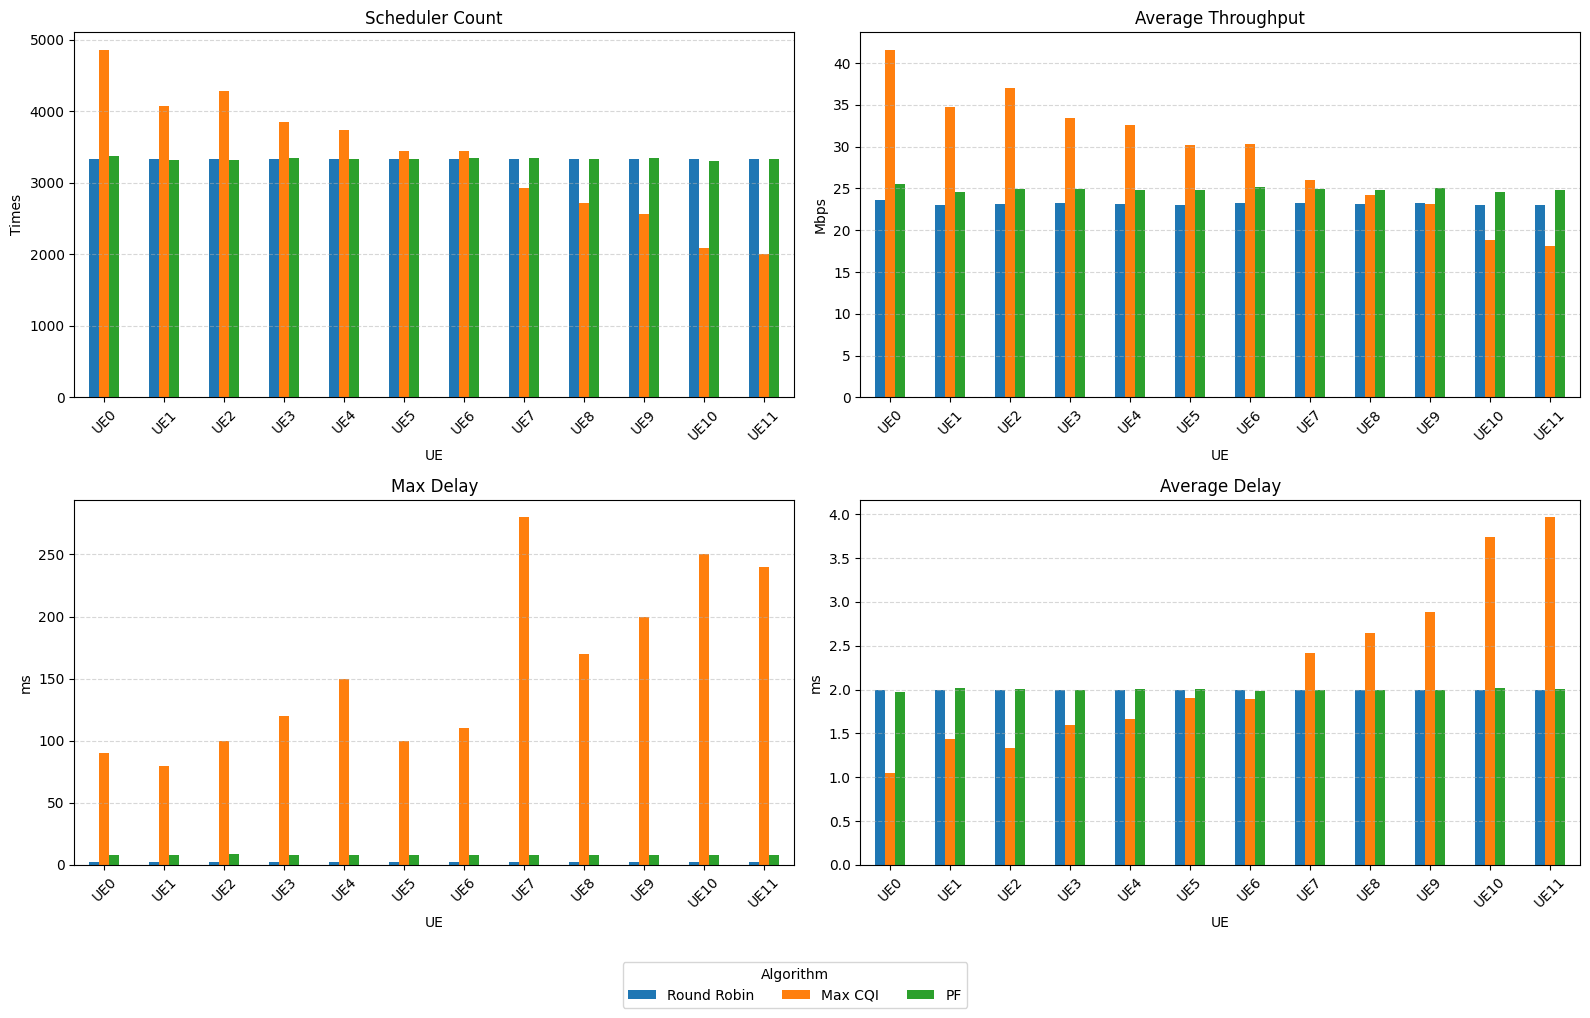

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Tạo 2x2 subplot grid

# Biểu đồ 1: Scheduler Count
scheduler_count_DF2.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("Scheduler Count")
axes[0, 0].set_ylabel("Times")
axes[0, 0].set_xlabel("UE")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 2: Average Throughput
avg_throughput_DF2.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Average Throughput")
axes[0, 1].set_ylabel("Mbps")
axes[0, 1].set_xlabel("UE")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 3: Max Delay
max_delay_DF2.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Max Delay")
axes[1, 0].set_ylabel("ms")
axes[1, 0].set_xlabel("UE")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 4: Average Delay
avg_delay_DF2.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title("Average Delay")
axes[1, 1].set_ylabel("ms")
axes[1, 1].set_xlabel("UE")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Xoá legend từng subplot
for ax in axes.flat:
    ax.legend().set_visible(False)

# Thêm legend chung ở dưới
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Algorithm", loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=3)

# Chừa khoảng bên dưới cho legend
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


## Ideal 100000bit

### Round Robin

In [15]:
ue = [col for col in RoundRobin_IdealTraffic.columns if col.startswith('UE')]
RoundRobin_IdealTraffic_UE = RoundRobin_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF3['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Round Robin'] = summary['Max Delay']
avg_delay_DF3['Round Robin'] = summary['Avg Delay']


total_throughput_DF1.at['Ideal Traffic', 'Round Robin'] = total_throughput_mbps

Avg Throughput for cell: 29.350662 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              54.235088        2.0   
UE1              3334                25              54.439416        2.0   
UE2              3334                25              53.952792        2.0   
UE3              3334                25              54.269640        2.0   
UE4              3333                25              26.444392        2.0   
UE5              3333                25              25.766280        2.0   
UE6              3333                25              26.364000        2.0   
UE7              3333                25              25.575304        2.0   
UE8              3333                25               7.628568        2.0   
UE9              3333                25               7.863992        2.0   
UE10             3333                25               7.660144        2.0  

### Max CQI

In [16]:
ue = [col for col in MaxCQI_IdealTraffic.columns if col.startswith('UE')]
MaxCQI_IdealTraffic_UE = MaxCQI_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF3['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Max CQI'] = summary['Max Delay']
avg_delay_DF3['Max CQI'] = summary['Avg Delay']


total_throughput_DF1.at['Ideal Traffic', 'Max CQI'] = total_throughput_mbps

Avg Throughput for cell: 44.064422 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              6486                25             103.892392        5.0   
UE1              6439                25             103.474424        5.0   
UE2              6505                25             103.547248        5.0   
UE3              6467                25             103.609784        5.0   
UE4              3724                25              30.553200        8.0   
UE5              3579                25              28.751872        8.0   
UE6              3497                25              28.572208        8.0   
UE7              3303                25              26.371936        8.0   
UE8                 0                 0               0.000000        0.0   
UE9                 0                 0               0.000000        0.0   
UE10                0                 0               0.000000        0.0  

### Proportional Fair

In [ ]:
ue = [col for col in PF_IdealTraffic.columns if col.startswith('UE')]
PF_IdealTraffic_UE = PF_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
# def calc_delays(series):
#     scheduled_idx = series[series > 0].index
#     delay_list = []
#     prev = -1
#     for idx in scheduled_idx:
#         if prev != -1:
#             delay = idx - prev - 1
#             delay_list.append(delay)
#         prev = idx
#     return pd.Series({
#         'Max Delay': max(delay_list) if delay_list else 0,
#         'Avg Delay': np.mean(delay_list) if delay_list else 0
#     })
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    if len(scheduled_idx) <= 1:
        return pd.Series({
            'Max Delay': 0,
            'Avg Delay': 0
        })
    
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx

    return pd.Series({
        'Max Delay': max(delay_list),
        'Avg Delay': np.mean(delay_list)
    })

delays = PF_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['PF'] = summary['Scheduler Count']
avg_throughput_DF3['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['PF'] = summary['Max Delay']
avg_delay_DF3['PF'] = summary['Avg Delay']

total_throughput_DF1.at['Ideal Traffic', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 40.628217 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              5493                25              90.986632        5.0   
UE1              5524                25              91.807224        5.0   
UE2              5480                25              90.444264        5.0   
UE3              5508                25              91.406488        5.0   
UE4              3119                25              27.153536        9.0   
UE5              3060                25              26.070408       10.0   
UE6              3112                25              26.991728       10.0   
UE7              3035                25              25.617272       10.0   
UE8              1390                25               4.128376       19.0   
UE9              1432                25               4.329680       19.0   
UE10             1404                25               4.154000       19.0  

### Analysics

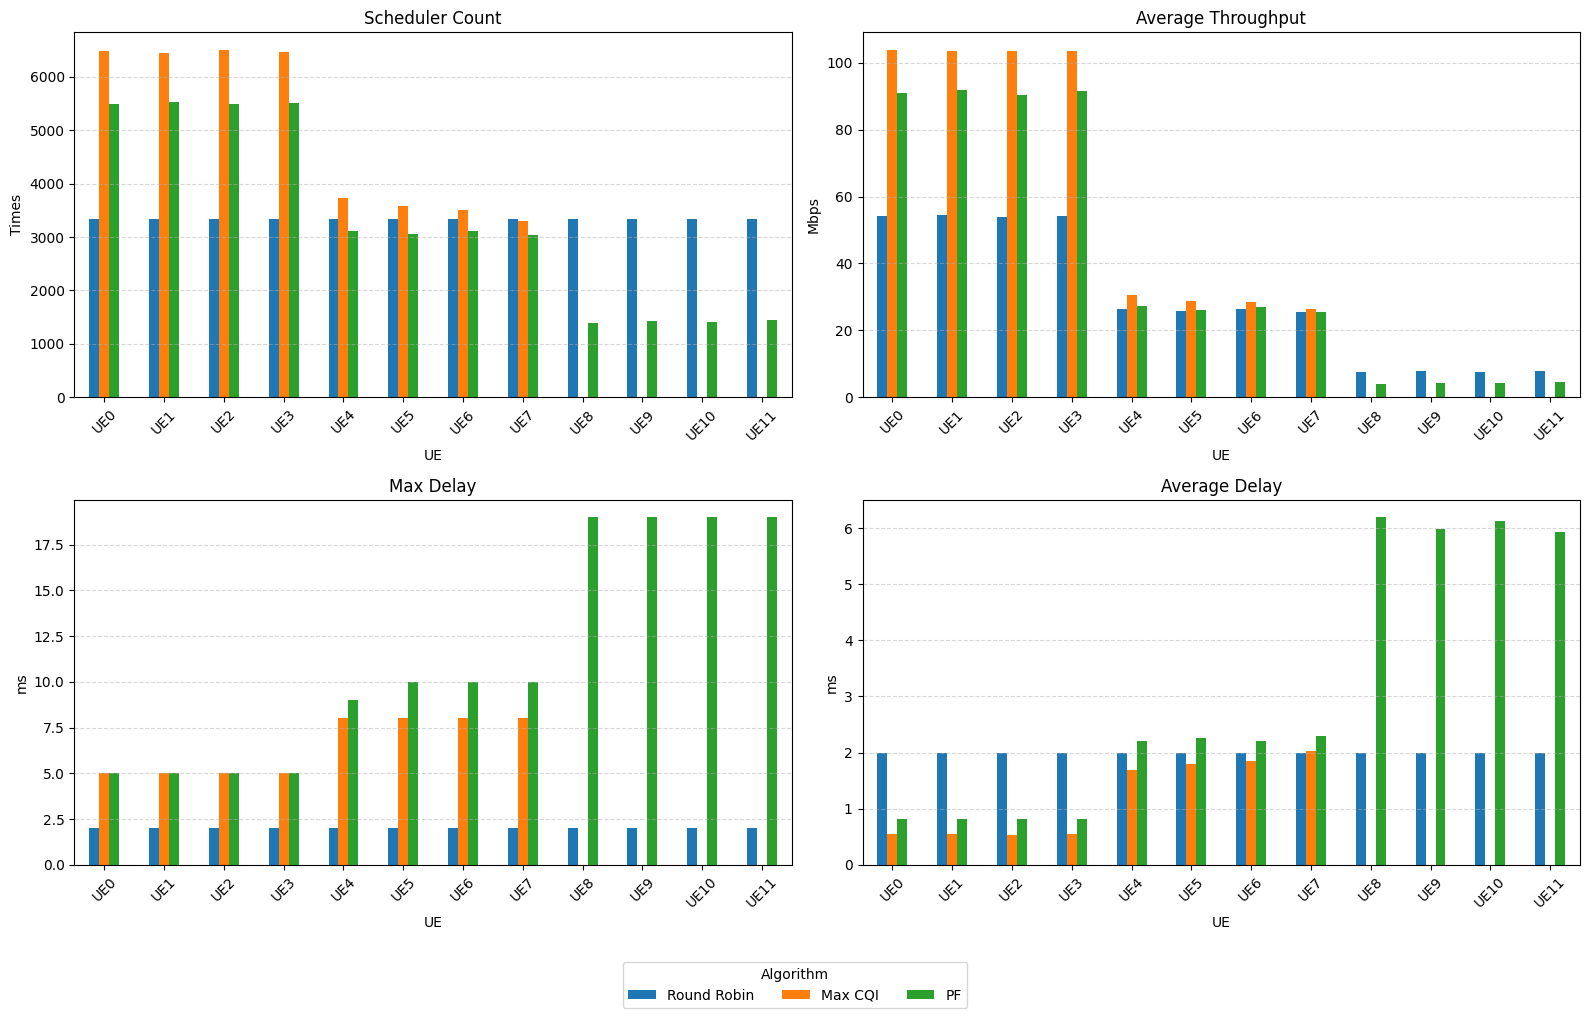

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Tạo 2x2 subplot grid

# Biểu đồ 1: Scheduler Count
scheduler_count_DF3.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("Scheduler Count")
axes[0, 0].set_ylabel("Times")
axes[0, 0].set_xlabel("UE")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 2: Average Throughput
avg_throughput_DF3.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Average Throughput")
axes[0, 1].set_ylabel("Mbps")
axes[0, 1].set_xlabel("UE")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 3: Max Delay
max_delay_DF3.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Max Delay")
axes[1, 0].set_ylabel("ms")
axes[1, 0].set_xlabel("UE")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 4: Average Delay
avg_delay_DF3.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title("Average Delay")
axes[1, 1].set_ylabel("ms")
axes[1, 1].set_xlabel("UE")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Xoá legend từng subplot
for ax in axes.flat:
    ax.legend().set_visible(False)

# Thêm legend chung ở dưới
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Algorithm", loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=3)

# Chừa khoảng bên dưới cho legend
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

## Mobility Partern

### Round Robin

In [19]:
ue = [col for col in RoundRobin_MobilityPattern.columns if col.startswith('UE')]
RoundRobin_MobilityPattern_UE = RoundRobin_MobilityPattern[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_MobilityPattern_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_MobilityPattern_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_MobilityPattern_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF4['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF4['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF4['Round Robin'] = summary['Max Delay']
avg_delay_DF4['Round Robin'] = summary['Avg Delay']

# total_throughput_DF1.at['Mobility Pattern', 'Round Robin'] = total_throughput_mbps


Avg Throughput for cell: 27.253228 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3336                25              27.307160        2.0   
UE1              3334                25              27.245936        2.0   
UE2              3334                25              27.257640        2.0   
UE3              3334                25              27.232136        2.0   
UE4              3333                25              27.290056        2.0   
UE5              3333                25              27.254320        2.0   
UE6              3333                25              27.246752        2.0   
UE7              3333                25              27.249128        2.0   
UE8              3333                25              27.252024        2.0   
UE9              3333                25              27.244736        2.0   
UE10             3331                25              27.233104        5.0  

### Max CQI

In [20]:
ue = [col for col in MaxCQI_MobilityPattern.columns if col.startswith('UE')]
MaxCQI_MobilityPattern_UE = MaxCQI_MobilityPattern[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_MobilityPattern_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_MobilityPattern_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_MobilityPattern_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF4['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF4['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF4['Max CQI'] = summary['Max Delay']
avg_delay_DF4['Max CQI'] = summary['Avg Delay']


# total_throughput_DF1.at['Mobility Pattern', 'Max CQI'] = total_throughput_mbps


Avg Throughput for cell: 47.439601 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3313                25              45.690496     1263.0   
UE1              3382                25              46.778224     1004.0   
UE2              3391                25              47.356424      890.0   
UE3              3431                25              47.277344      846.0   
UE4              3257                25              46.912992      738.0   
UE5              3269                25              47.280104      684.0   
UE6              3291                25              47.960872      616.0   
UE7              3325                25              48.106960      615.0   
UE8              3339                25              48.237328      557.0   
UE9              3421                25              48.868608      535.0   
UE10             3293                25              47.496272      505.0  

### Proportional Fair

In [21]:
ue = [col for col in PF_MobilityPattern.columns if col.startswith('UE')]
PF_MobilityPattern_UE = PF_MobilityPattern[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_MobilityPattern_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_MobilityPattern_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_MobilityPattern_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF4['PF'] = summary['Scheduler Count']
avg_throughput_DF4['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF4['PF'] = summary['Max Delay']
avg_delay_DF4['PF'] = summary['Avg Delay']


# total_throughput_DF1.at['Mobility Pattern', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 36.667735 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3249                25              35.311432       11.0   
UE1              3286                25              35.977088       11.0   
UE2              3310                25              36.414928       10.0   
UE3              3335                25              36.694096       10.0   
UE4              3355                25              36.975136       10.0   
UE5              3357                25              37.095024       10.0   
UE6              3347                25              36.925840       11.0   
UE7              3347                25              36.849904       11.0   
UE8              3345                25              36.890312       11.0   
UE9              3351                25              36.920600       11.0   
UE10             3348                25              36.864288       10.0  

### Analysics

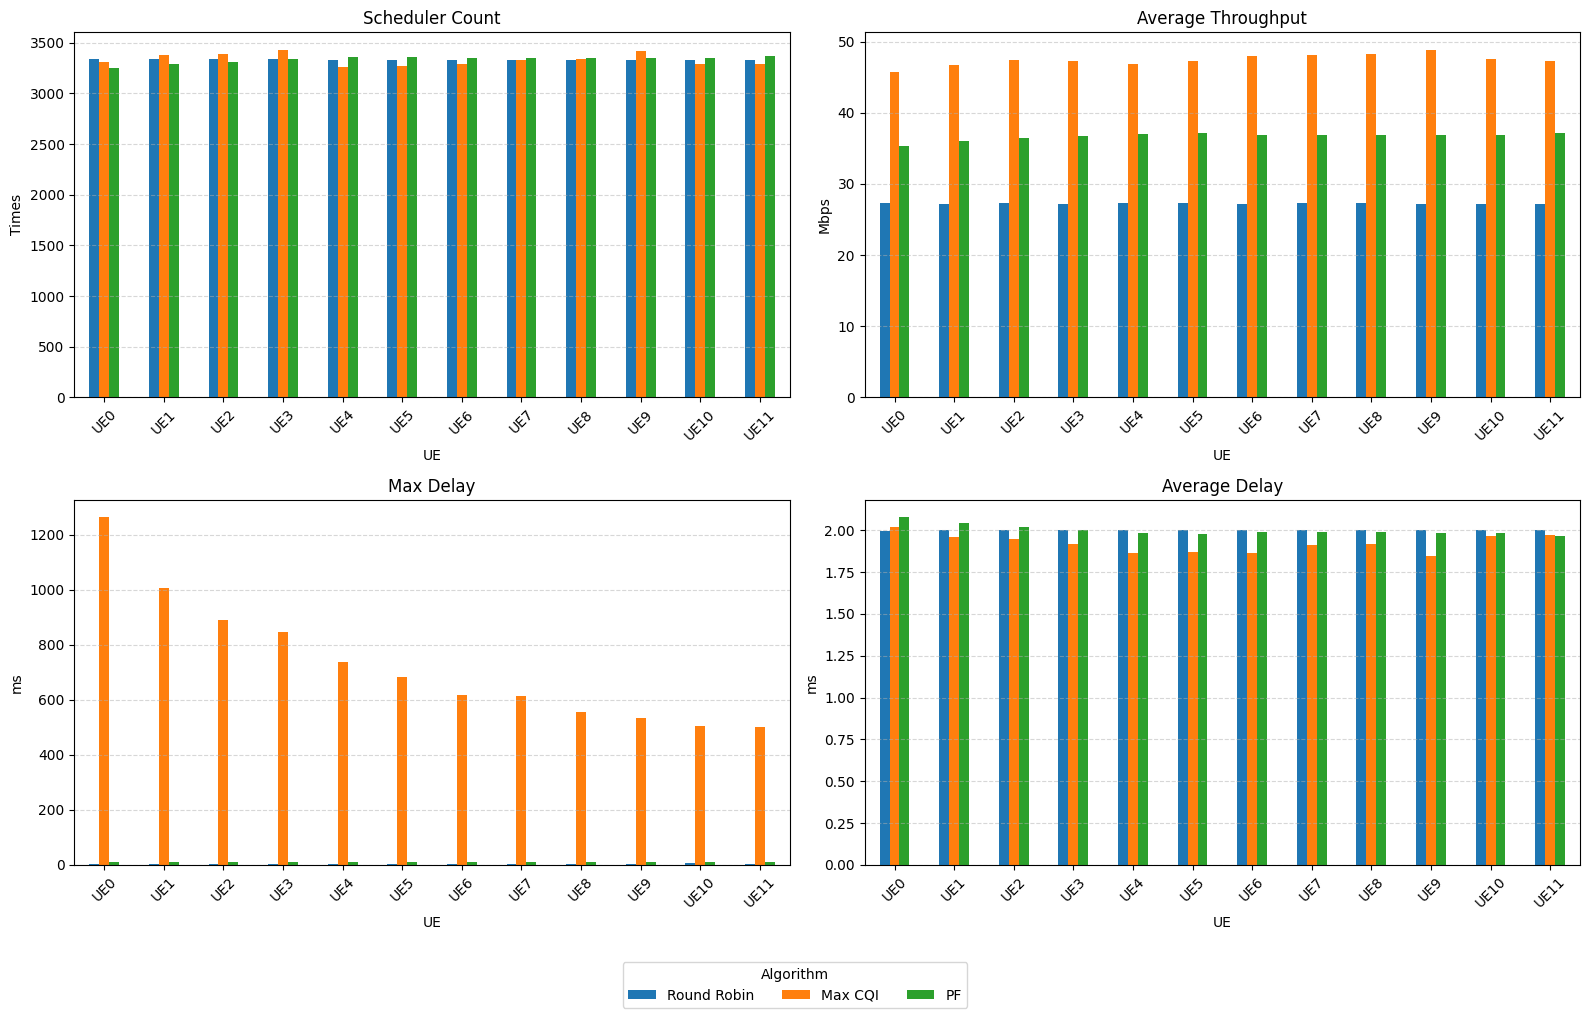

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Tạo 2x2 subplot grid

# Biểu đồ 1: Scheduler Count
scheduler_count_DF4.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("Scheduler Count")
axes[0, 0].set_ylabel("Times")
axes[0, 0].set_xlabel("UE")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 2: Average Throughput
avg_throughput_DF4.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Average Throughput")
axes[0, 1].set_ylabel("Mbps")
axes[0, 1].set_xlabel("UE")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 3: Max Delay
max_delay_DF4.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Max Delay")
axes[1, 0].set_ylabel("ms")
axes[1, 0].set_xlabel("UE")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 4: Average Delay
avg_delay_DF4.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title("Average Delay")
axes[1, 1].set_ylabel("ms")
axes[1, 1].set_xlabel("UE")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Xoá legend từng subplot
for ax in axes.flat:
    ax.legend().set_visible(False)

# Thêm legend chung ở dưới
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Algorithm", loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=3)

# Chừa khoảng bên dưới cho legend
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

## Low traffic

### Round Robin

In [23]:
ue = [col for col in RoundRobin_LowTraffic.columns if col.startswith('UE')]
RoundRobin_LowTraffic_UE = RoundRobin_LowTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_LowTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_LowTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_LowTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF5['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF5['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF5['Round Robin'] = summary['Max Delay']
avg_delay_DF5['Round Robin'] = summary['Avg Delay']


total_throughput_DF1.at['Low Traffic', 'Round Robin'] = total_throughput_mbps

Avg Throughput for cell: 21.851933 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              1474                25              21.919832       11.0   
UE1              1473                25              21.653496       11.0   
UE2              1468                25              21.701872       11.0   
UE3              1445                25              21.715520       11.0   
UE4              1500                25              22.206592       11.0   
UE5              1479                25              21.929856       11.0   
UE6              1438                25              21.582000       11.0   
UE7              1482                25              21.992616       11.0   
UE8              1481                25              22.041976       11.0   
UE9              1470                25              21.763048       11.0   
UE10             1492                25              22.021720       11.0  

### Max CQI

In [24]:
ue = [col for col in MaxCQI_LowTraffic.columns if col.startswith('UE')]
MaxCQI_LowTraffic_UE = MaxCQI_LowTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_LowTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_LowTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_LowTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF5['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF5['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF5['Max CQI'] = summary['Max Delay']
avg_delay_DF5['Max CQI'] = summary['Avg Delay']


total_throughput_DF1.at['Low Traffic', 'Max CQI'] = total_throughput_mbps

Avg Throughput for cell: 21.851933 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              1474                25              21.919832       13.0   
UE1              1473                25              21.653496       13.0   
UE2              1468                25              21.701872       13.0   
UE3              1445                25              21.715520       13.0   
UE4              1500                25              22.206592       13.0   
UE5              1479                25              21.929856       13.0   
UE6              1438                25              21.582000       13.0   
UE7              1482                25              21.992616       13.0   
UE8              1481                25              22.041976       13.0   
UE9              1470                25              21.763048       13.0   
UE10             1492                25              22.021720       13.0  

### Proportional Fair

In [25]:
ue = [col for col in PF_LowTraffic.columns if col.startswith('UE')]
PF_LowTraffic_UE = PF_LowTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_LowTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_LowTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_LowTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF5['PF'] = summary['Scheduler Count']
avg_throughput_DF5['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF5['PF'] = summary['Max Delay']
avg_delay_DF5['PF'] = summary['Avg Delay']


total_throughput_DF1.at['Low Traffic', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 21.851933 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              1474                25              21.919832       11.0   
UE1              1473                25              21.653496       11.0   
UE2              1468                25              21.701872       11.0   
UE3              1445                25              21.715520       11.0   
UE4              1500                25              22.206592       11.0   
UE5              1479                25              21.929856       11.0   
UE6              1438                25              21.582000       11.0   
UE7              1482                25              21.992616       11.0   
UE8              1481                25              22.041976       11.0   
UE9              1470                25              21.763048       11.0   
UE10             1492                25              22.021720       11.0  

### Analysics

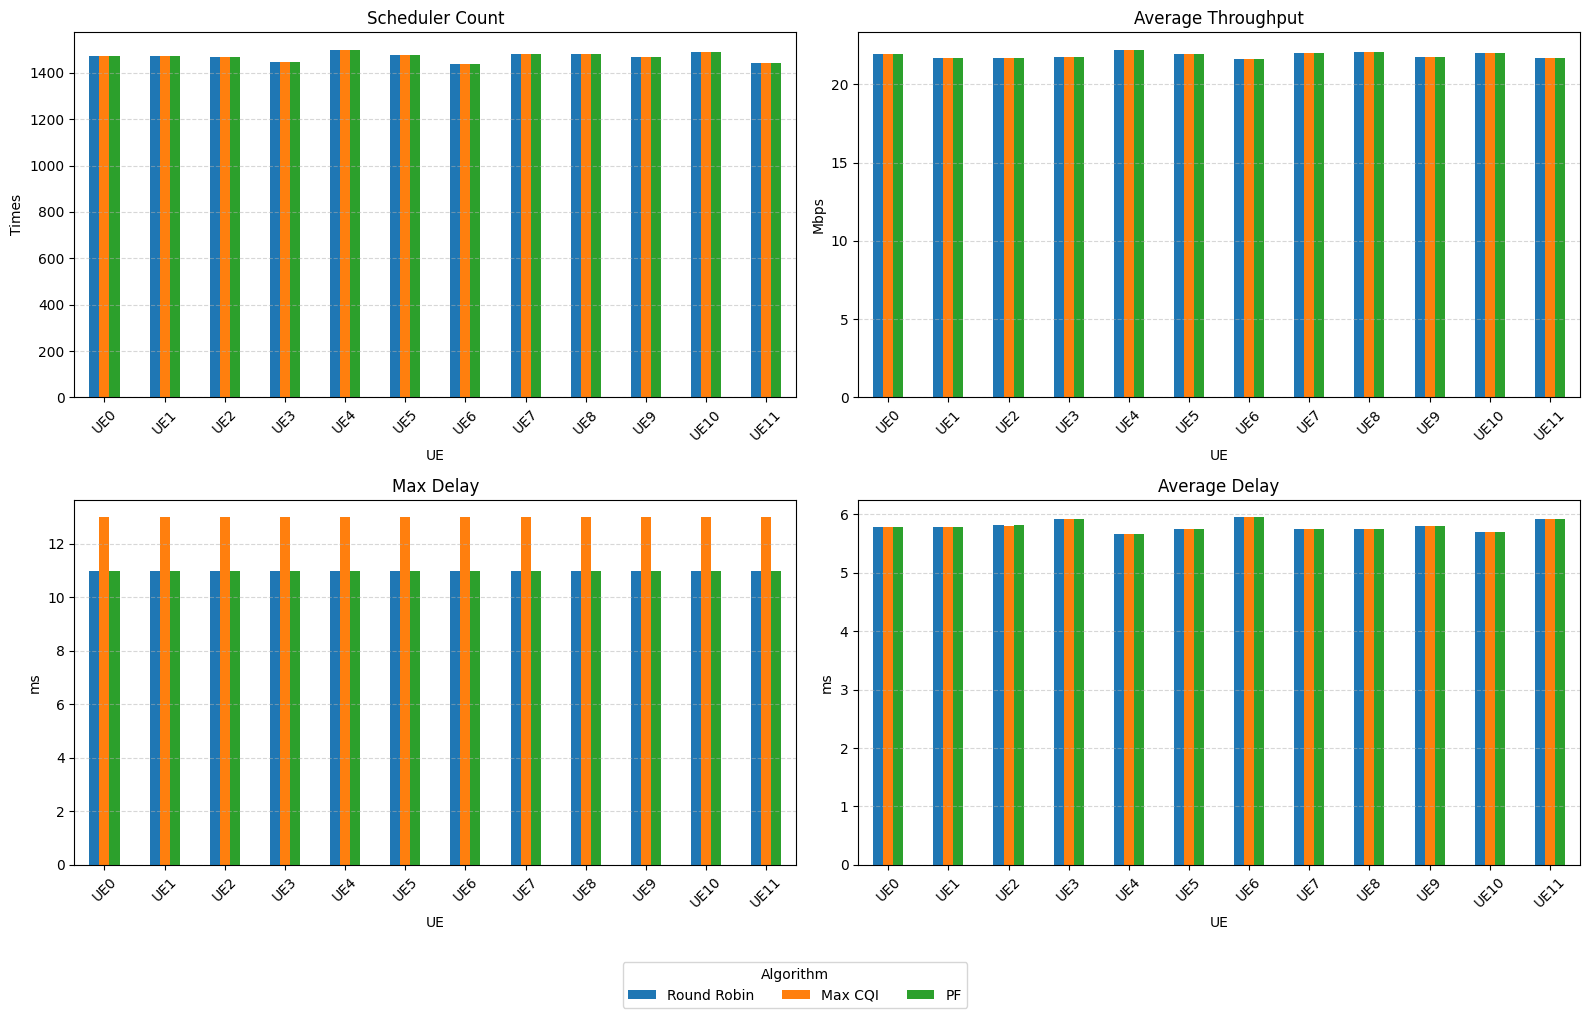

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Tạo 2x2 subplot grid

# Biểu đồ 1: Scheduler Count
scheduler_count_DF5.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("Scheduler Count")
axes[0, 0].set_ylabel("Times")
axes[0, 0].set_xlabel("UE")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 2: Average Throughput
avg_throughput_DF5.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Average Throughput")
axes[0, 1].set_ylabel("Mbps")
axes[0, 1].set_xlabel("UE")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 3: Max Delay
max_delay_DF5.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Max Delay")
axes[1, 0].set_ylabel("ms")
axes[1, 0].set_xlabel("UE")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 4: Average Delay
avg_delay_DF5.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title("Average Delay")
axes[1, 1].set_ylabel("ms")
axes[1, 1].set_xlabel("UE")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Xoá legend từng subplot
for ax in axes.flat:
    ax.legend().set_visible(False)

# Thêm legend chung ở dưới
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Algorithm", loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=3)

# Chừa khoảng bên dưới cho legend
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

## Total Throughput

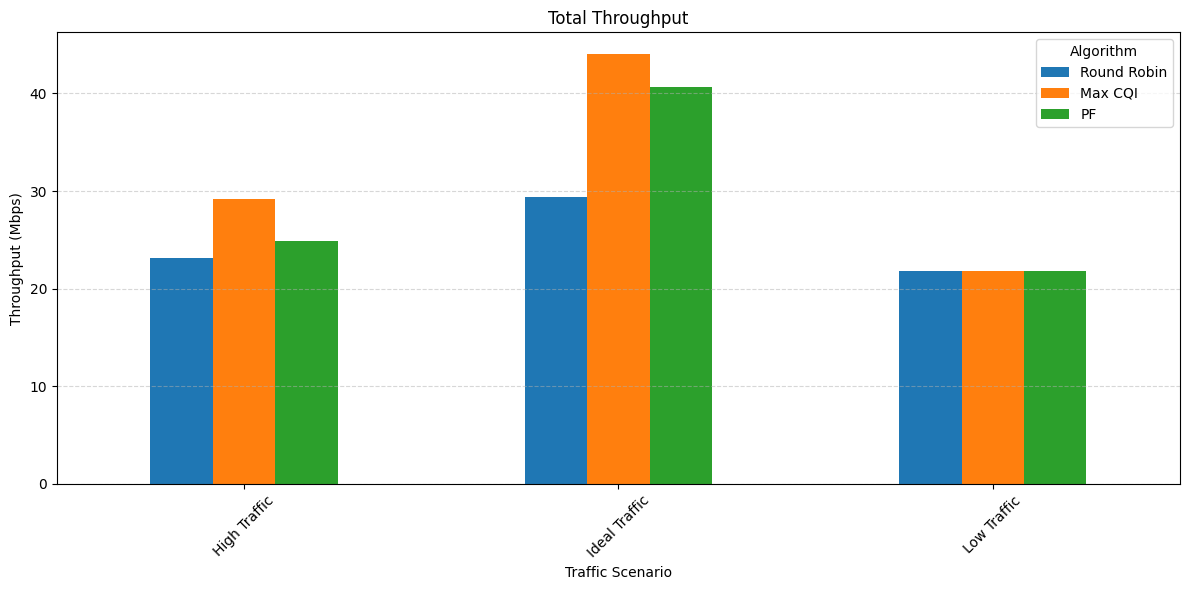

In [27]:

total_throughput_DF1.plot(kind='bar', figsize=(12, 6))

plt.title("Total Throughput")
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Traffic Scenario")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()